Частина 1

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import optimizers
from keras import losses
from keras import metrics
from keras.callbacks import EarlyStopping

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
num_classes = 10 # общее количество классов, в нашем случае это цифры от 0 до 9
batch_size = 500 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

train_images = train_data.reshape((60000, 28, 28, 1))
train_images = train_data.astype("float32") / 255
train_labels=tf.one_hot(train_labels, depth=num_classes)

test_images=test_data.reshape((10000,28,28,1))
test_images=test_images.astype("float32")/255
test_labels=tf.one_hot(test_labels, depth=num_classes)

In [ ]:
plt.imshow(test_data[0], cmap='gray')
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="sigmoid", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="sigmoid"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="sigmoid"),

    Flatten(),
    Dense(128, activation="sigmoid"),

    Dense(10, activation="softmax")
])

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=losses.CategoricalCrossentropy(),
    metrics=['categorical_accuracy'],
)

In [ ]:
callback_early_stopping = EarlyStopping(
    monitor="val_categorical_accuracy",
    min_delta=0.0001,
    patience=5,
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
history=model.fit(
    train_images,
    train_labels,
    epochs=50,
    batch_size=batch_size,
    validation_data=(test_images, test_labels),
    callbacks=[callback_early_stopping],
    verbose=1,
)

Epoch 1/50
120/120 [==============================] - 64s 523ms/step - loss: 2.1881 - categorical_accuracy: 0.1989 - val_loss: 1.3975 - val_categorical_accuracy: 0.5446
Epoch 2/50
120/120 [==============================] - 59s 496ms/step - loss: 0.9425 - categorical_accuracy: 0.6733 - val_loss: 0.8030 - val_categorical_accuracy: 0.7073
Epoch 3/50
120/120 [==============================] - 58s 486ms/step - loss: 0.7267 - categorical_accuracy: 0.7293 - val_loss: 0.7100 - val_categorical_accuracy: 0.7303
Epoch 4/50
120/120 [==============================] - 60s 495ms/step - loss: 0.6562 - categorical_accuracy: 0.7520 - val_loss: 0.6623 - val_categorical_accuracy: 0.7499
Epoch 5/50
120/120 [==============================] - 59s 496ms/step - loss: 0.6120 - categorical_accuracy: 0.7685 - val_loss: 0.6334 - val_categorical_accuracy: 0.7556
Epoch 6/50
120/120 [==============================] - 58s 487ms/step - loss: 0.5748 - categorical_accuracy: 0.7830 - val_loss: 0.5843 - val_categorical_acc

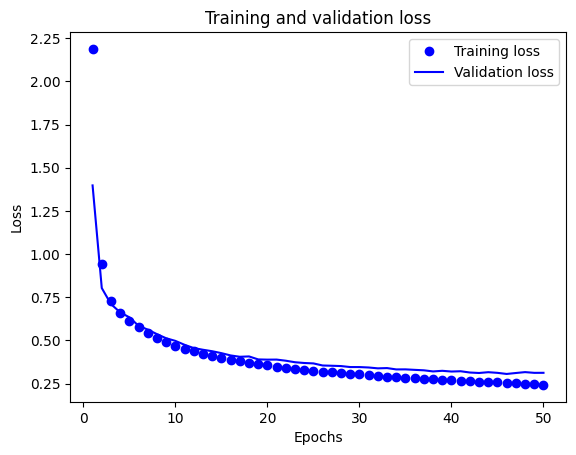

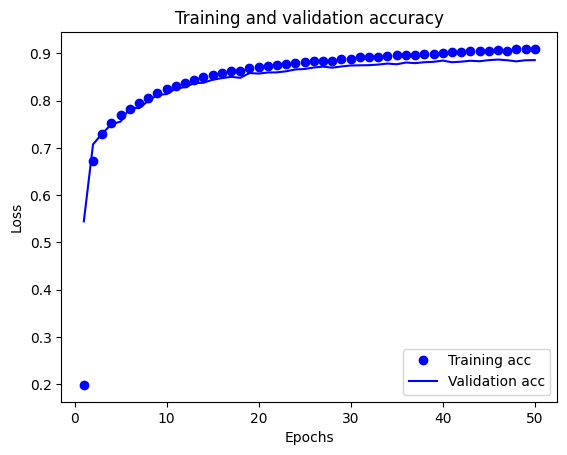

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_categorical_accuracy']
plt.plot(epochs, history_dict['categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_categorical_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
results = model.evaluate(test_images, test_labels)
print(results)

313/313 [==============================] - 3s 10ms/step - loss: 0.3120 - categorical_accuracy: 0.8855
[0.31203848123550415, 0.8855000138282776]


In [ ]:
model.save("/content/drive/MyDrive/Data S/Hw10/model_Hw10_part1_")

Висновки

Була розроблена нейрона мережа на базі згорткової моделі. Отримана точність 88%